# Import Dataset

In [ ]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
%matplotlib inline

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
data = pd.read_csv('OnlineRetail.csv')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55    17850.00  United Kingdom  
1  12/1/2010 8:26       3.39    17850.00  United Kingdom  
2  12/1/2010 8:26       2.75    17850.00  United Kingdom  
3  12/1/2010 8:26       3.39    17850.00  United Kingdom  
4  12/1/2010 8:26       3.39    17850.00  United Kingdom

# **TO-DO:** Data Preprocessing

In [ ]:
# **TO-DO** Print the number of duplicate items


Duplicate Items in Dataset:5268


## **TO-DO:** Remove Duplicate items from dataset

In [ ]:
# **TO-DO** Remove duplicate items from the dataset


## **TO-DO:** Check for missing values

In [ ]:
# **TO-DO** Display count of missing values


Count of Missing values:InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


## **TO-DO:** Create new Invoice List

In [ ]:
# **TO-DO** Creates a list of unique invoice No. with Null Customer ID


In [ ]:
print("InvoiceLise: ", invoice_list[:10])
print("Invoice Size:", len(invoice_list))

InvoiceLise:  ['536414', '536544', '536544', '536544', '536544', '536544', '536544', '536544', '536544', '536544']
Invoice Size: 135037


## **TO-DO:** Removing Inconsistent Records

In [ ]:
# **TO-DO** Checking the number of records with Quantity Negative and Prices 0 or Vice versa


# **TO-DO** Checking if Negative quantities are cancelled items

# **TO-DO** Checking for Records with Negative Unit Price

# **TO-DO** Checking for Records with Unit Price 0


The number of records with Quantity Negative and Prices 0 or Vice versa :  1336
Cancelled Items have Invoice Starting with :  ['C']
The number of transactions with Negative Unit Price :  2
The number of transactions with Unit Price 0 :  40


In [ ]:
# **TO-DO** Removing records with Null Customer ID


In [ ]:
# Copy the dataset and convert CustomerID to int
rfm_train = data.copy()
rfm_train.CustomerID = (rfm_train.CustomerID).astype(int)

In [ ]:
# **TO-DO** Count the number of missing values


Count of Missing values:InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Cancelled Items


In [ ]:
## remove transactions with Cancelled Items.
placed = rfm_train[~rfm_train.InvoiceNo.str.contains('C',na=False)]

In [ ]:
placed['TotalCost'] = rfm_train.Quantity * rfm_train.UnitPrice

<ipython-input-24-ee3f9bd42329>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed['TotalCost'] = rfm_train.Quantity * rfm_train.UnitPrice


In [ ]:
placed.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0  12/1/2010 8:26       2.55       17850  United Kingdom      15.30  
1  12/1/2010 8:26       3.39       17850  United Kingdom      20.34  
2  12/1/2010 8:26       2.75       17850  United Kingdom      22.00  
3  12/1/2010 8:26       3.39       17850  United Kingdom      20.34  
4  12/1/2010 8:26       3.39       17850  United Kingdom      20.34

# **TO-DO:** Exploratory Data Analysis

In [ ]:
# **TO-DO** Find The Time Period of Transactions


Oldest date is:1/10/2011 10:32

Latest date is:9/9/2011 9:52



## **TO-DO:** Order Density in Different Countries

In [ ]:
# **TO-DO** Display the proportion of order based on country as below


Country
United Kingdom    88.9%
Germany            2.3%
France             2.1%
EIRE               1.8%
Spain              0.6%
Netherlands        0.6%
Belgium            0.5%
Switzerland        0.5%
Portugal           0.4%
Australia          0.3%
Norway             0.3%
Italy              0.2%
Name: proportion, dtype: object

<ipython-input-28-d377721275f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  placed['InvoiceDate'] = pd.to_datetime(placed['InvoiceDate'], errors='coerce')


<Axes: xlabel='InvoiceDate'>

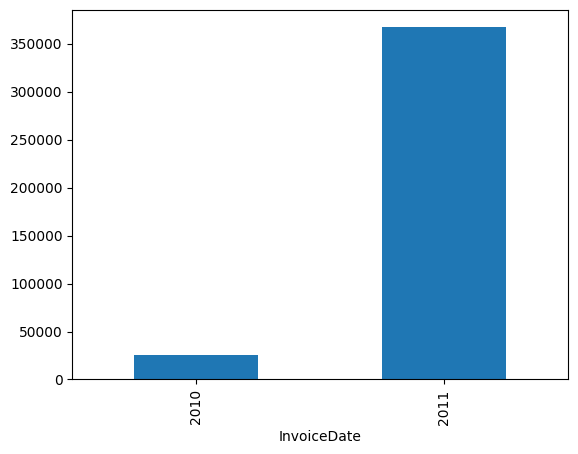

In [ ]:
# **TO-DO** Produce the following Bar Graph Below comparing the number invoices by year


<Axes: xlabel='InvoiceDate'>

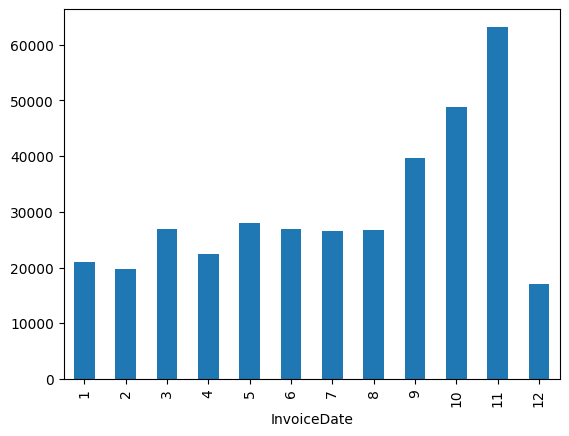

In [ ]:
# **TO-DO** Produce the following Bar Graph Below comparing the number invoices by month in 2011


## **Monthly Gross**

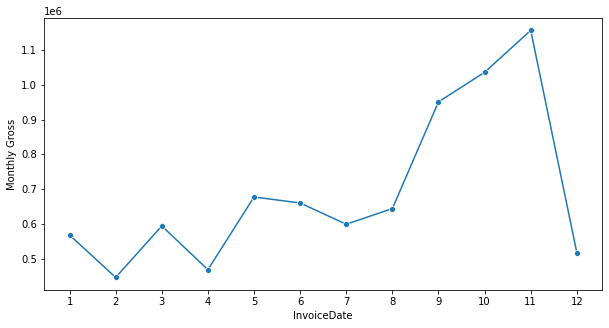

In [ ]:
# **TO-DO** Produce the following Bar Graph Below comparing the monthly gross rate in 2011


<Axes: ylabel='UnitPrice'>

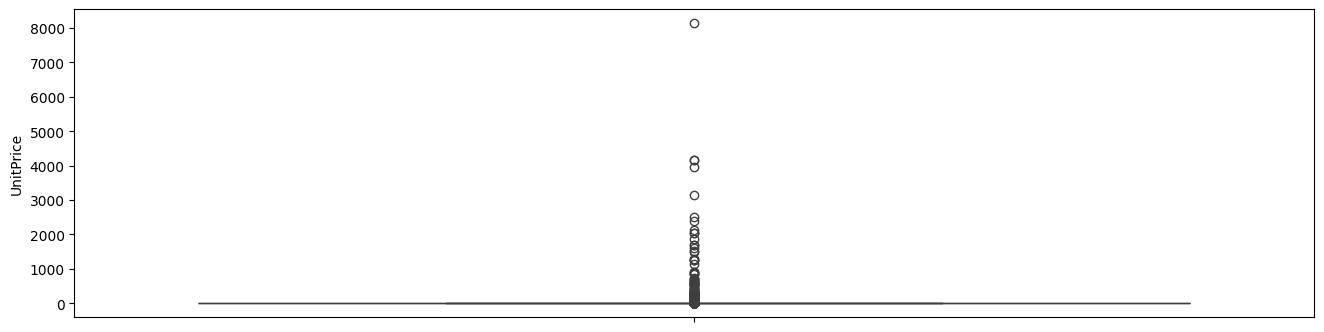

In [ ]:
plt.figure(figsize=(16,4))
sns.boxplot(y='UnitPrice',data = placed,orient=("Horizontal", "y"))

Unit Price is more concentrated in lower values of prices.

## **Top Selling Products**

In [ ]:
placed.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom      15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom      20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom      22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom      20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom      20.34

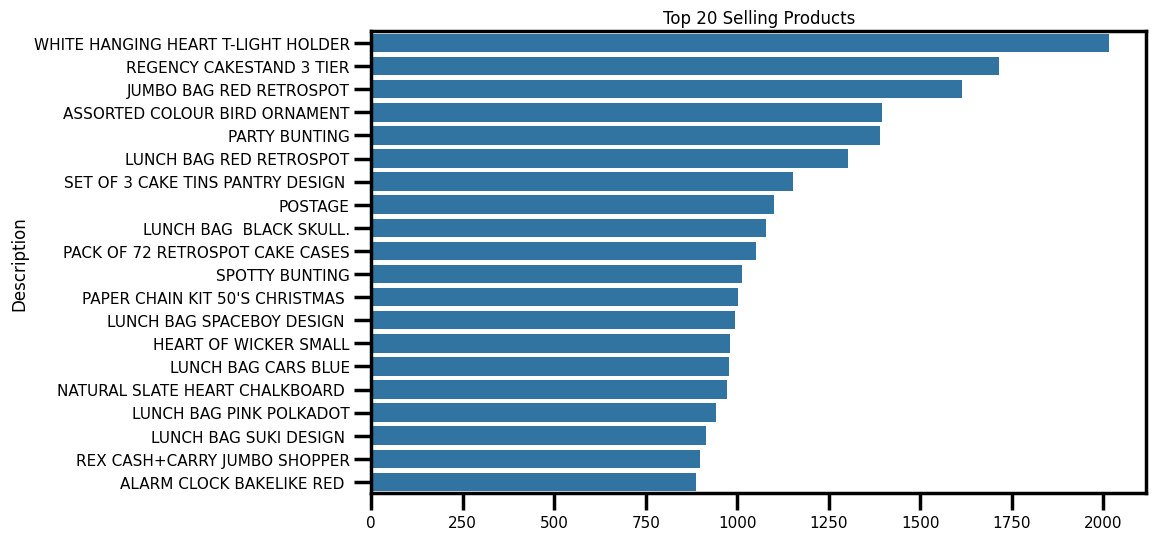

In [ ]:
# **TO-DO** Produce the following Graph displaying the top 20 selling products


# **TO-DO:** Receny, Frequency, Montary (RFM) ANALYSIS               

## **TO-DO:** Recency

In [ ]:
# **TO-DO** Print Lastest date in the Order History


9/9/2011 9:52


In [ ]:
current_date = dt.date(2011,12,10)

In [ ]:
rfm_train['InvoiceDate'] = pd.to_datetime(rfm_train['InvoiceDate'], errors='coerce')
rfm_train['Purchase_Date'] = rfm_train.InvoiceDate.dt.date
print(rfm_train['Purchase_Date'])

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: Purchase_Date, Length: 401604, dtype: object


**TO-DO** Create Seperate Column for Recency

In [ ]:
recency = rfm_train.groupby('CustomerID')['Purchase_Date'].max().reset_index()

In [ ]:
# **TO-DO** Calculate Recency based on purchase date and current date

# Display Recency
recency.head()

CustomerID Purchase_Date Current_Date  Recency
0       12346    2011-01-18   2011-12-10      326
1       12347    2011-12-07   2011-12-10        3
2       12348    2011-09-25   2011-12-10       76
3       12349    2011-11-21   2011-12-10       19
4       12350    2011-02-02   2011-12-10      311

In [ ]:
# **TO-DO** Drop Date Columns which are not useful anymore.

recency.head()

CustomerID  Recency
0       12346      326
1       12347        3
2       12348       76
3       12349       19
4       12350      311

**TO-DO** Create Seperate Column for Frequency

In [ ]:
# **TO-DO** Calculate Frequency based on Customer ID

frequency.head()

CustomerID  Frequency
0       12346          2
1       12347          7
2       12348          4
3       12349          1
4       12350          1

**TO-DO** Create seperate Column for Monetary

In [ ]:
# **TO-DO** Calculate Total Cost (Quantity * Price)

rfm_train.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country Purchase_Date  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom    2010-12-01   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom    2010-12-01   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom    2010-12-01   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom    2010-12-01   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom    2010-12-01   

   TotalCost  
0      15.30  
1      20.34  
2      22.00  
3      20.34  
4      20.34

In [ ]:
# **TO-DO** Calculate Monetary based on total cost per Customer

monetary.head()

CustomerID  Monetary
0       12346      0.00
1       12347   4310.00
2       12348   1797.24
3       12349   1757.55
4       12350    334.40

## **TO-DO:** Combine Recency, Frequency and Monetary

In [ ]:
# **TO-DO** Combine Recency, Frequency and Monetary into a single table

rfm_table.head()

Recency  Frequency  Monetary
CustomerID                              
12346           326          2      0.00
12347             3          7   4310.00
12348            76          4   1797.24
12349            19          1   1757.55
12350           311          1    334.40

## **TO-DO:** QQ Plot

In [ ]:
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox

def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

A Quantile-Quantile (QQ) plot is a graphical tool to assess if a dataset follows a specified distribution, typically the normal distribution. It does this by plotting the quantiles of the dataset against the quantiles of the theoretical distribution. If the points roughly follow a straight line, the data is approximately normally distributed.
Key Components of a QQ Plot

How to Interpret a QQ Plot

    Straight Line: If the points form a roughly straight line, the data follows the theoretical distribution.
    S-shaped Curve: If the points form an S-shape, the data may have heavier tails than the theoretical distribution.
    Convex/Concave Curve: Indicates a skewness in the data.

<ipython-input-52-1834c5c73f06>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


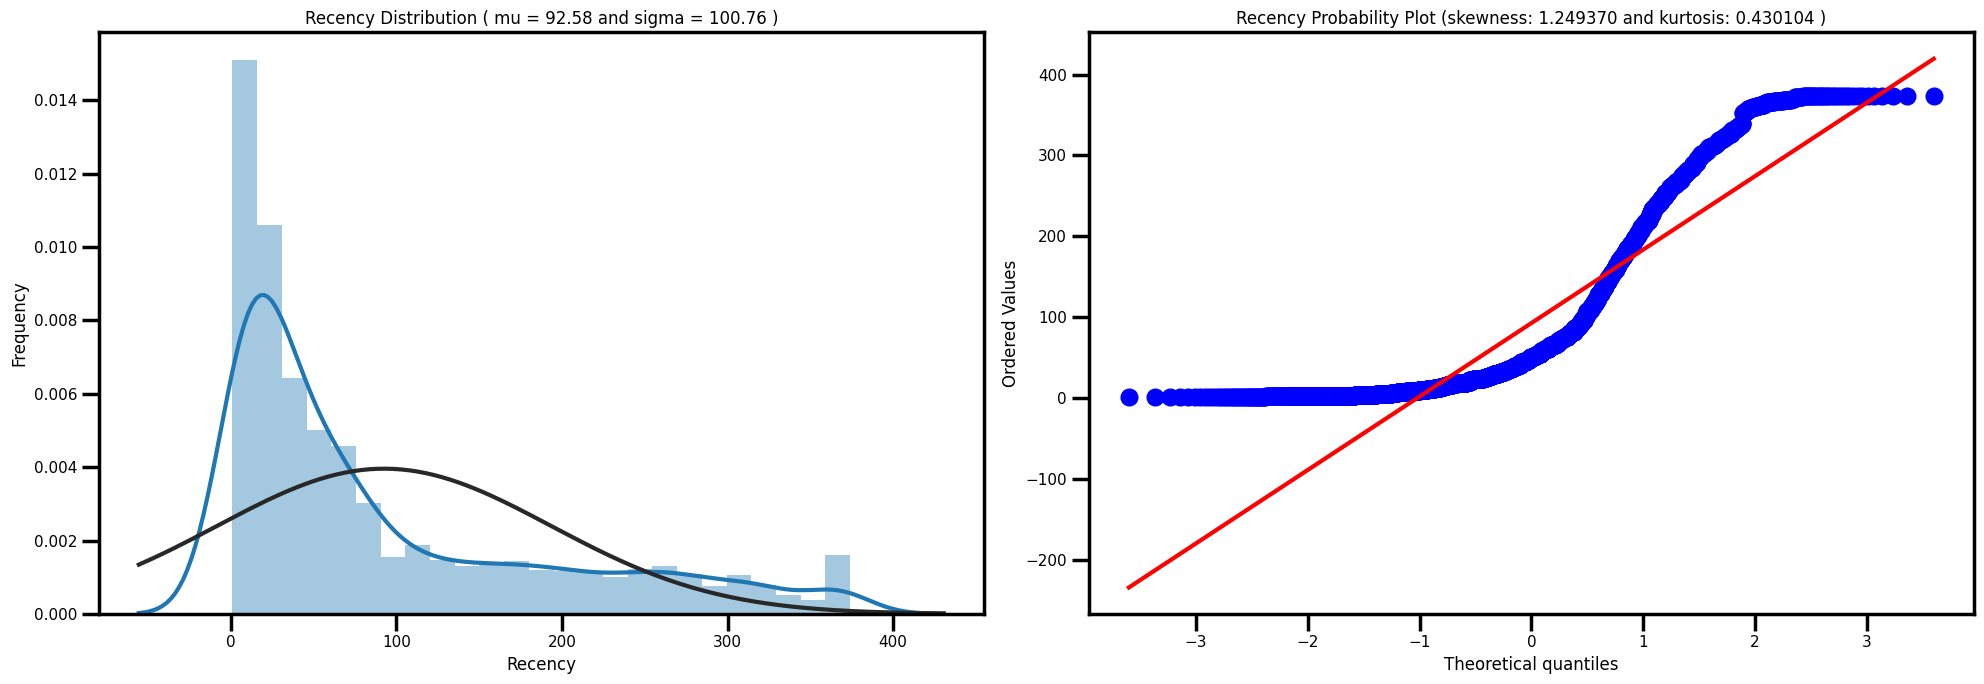

In [ ]:
# **TO-DO** Generate the below Recency graphs using the QQ_plot function


<ipython-input-52-1834c5c73f06>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


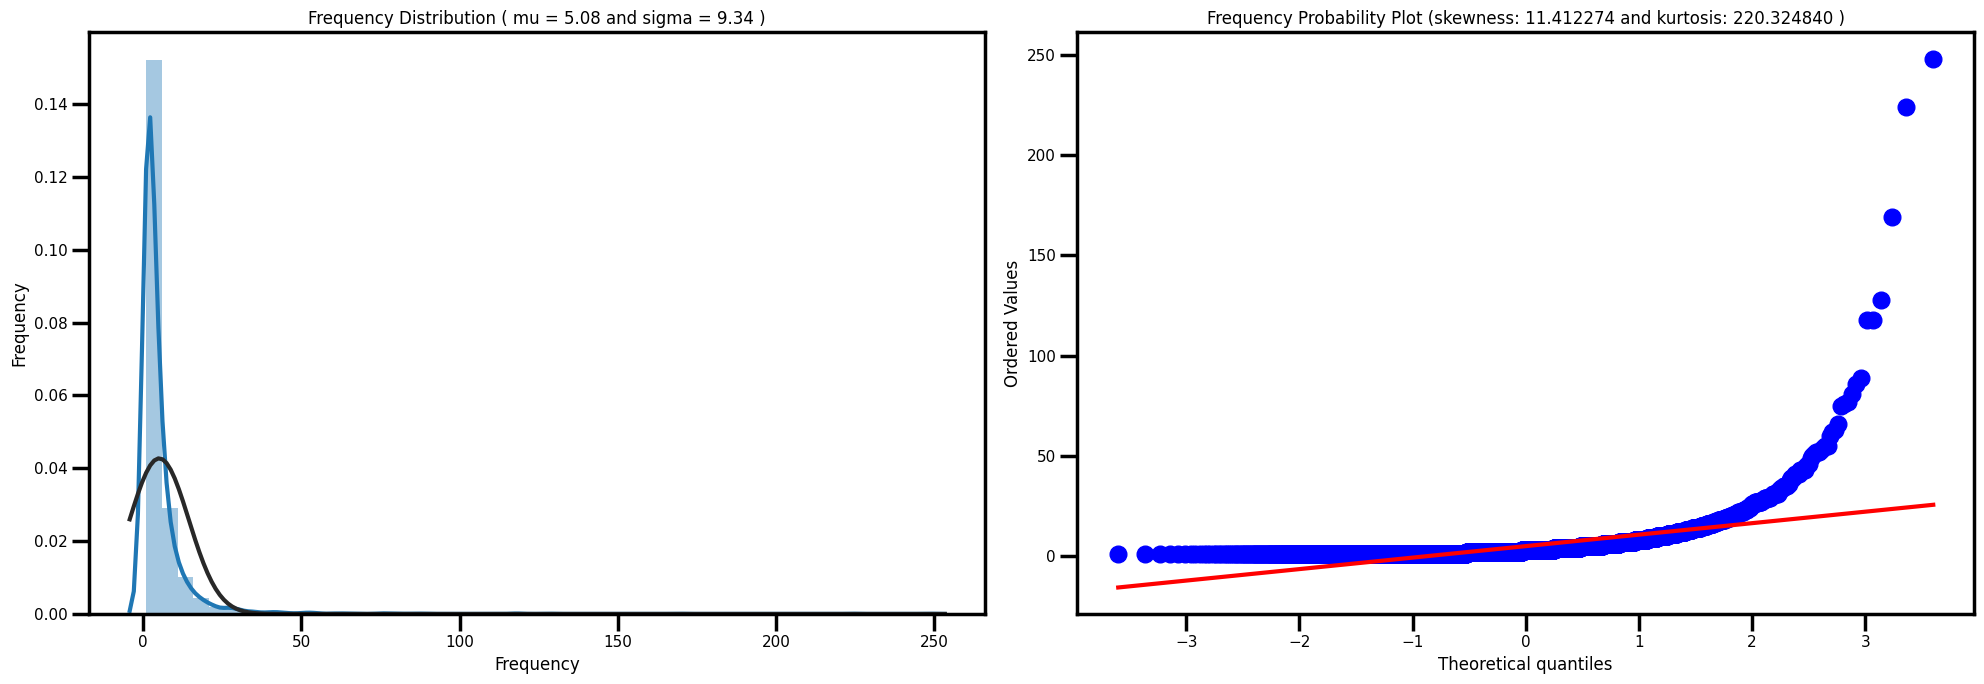

In [ ]:
# **TO-DO** Generate the below Frequency graphs using the QQ_plot function


<ipython-input-52-1834c5c73f06>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


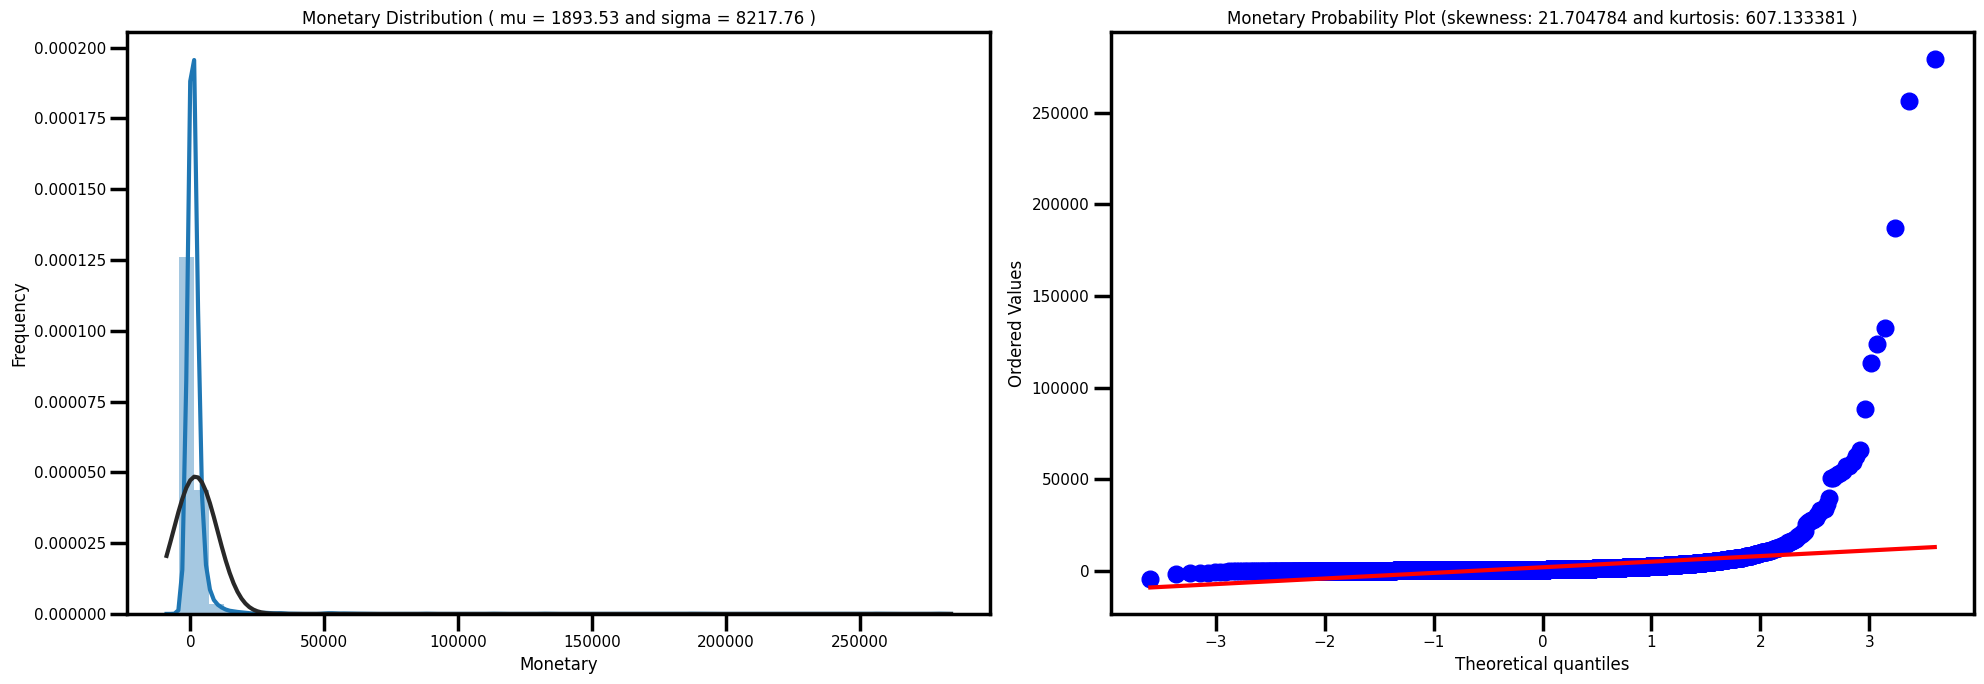

In [ ]:
# **TO-DO** Generate the below Monetary graphs using the QQ_plot function


# **Customer Segmentation Using Quantiles**

In [ ]:
# **TO-DO** Calcualte the quantils for recency, frenuency, and monetary

print(quantil)

      Recency  Frequency  Monetary
0.25    17.00       1.00    291.80
0.50    51.00       3.00    644.07
0.75   144.00       5.00   1608.34


Quantiles in General:

    0.25 Quantile (25th Percentile): This is the value below which 25% of the data falls. It’s also known as the
    first quartile.
    0.50 Quantile (50th Percentile): This is the median, the middle value of the data. Half of the data lies below
    this value.
    0.75 Quantile (75th Percentile): This is the value below which 75% of the data falls. It’s also known as the
    third quartile.

In [ ]:
# Convert quantil into dict to access each value
quantil = quantil.to_dict()
print(quantil)

{'Recency': {0.25: 17.0, 0.5: 51.0, 0.75: 144.0}, 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0}, 'Monetary': {0.25: 291.795, 0.5: 644.0699999999999, 0.75: 1608.335}}


    RecencyPoints Function: Assigns points to customers based on how recently they made their last purchase, giving
    higher scores (4) to more recent purchases.
    Freq_MonetaryPoints Function: Assigns points to customers based on their purchase frequency and monetary value,
    giving higher scores to more frequent and higher spending customers.
    Application: These functions are applied to the DataFrame to segment customers into quartiles for each RFM
    metric, facilitating further analysis and customer segmentation.

By applying these functions, businesses can better understand customer behavior and tailor marketing strategies accordingly, targeting different customer segments based on their RFM scores.

In [ ]:
# **TO-DO** Define the recency points function
# 0-25% = 4 / 25%-50% = 3 / 50%-75% = 2 / 75%-100% = 1
def RecencyPoints(y,rfm,q):

  pass

# **TO-DO** Define the recency points function
# 0-25% = 4 / 25%-50% = 3 / 50%-75% = 2 / 75%-100% = 1
def Freq_MonetaryPoints(y,rfm,q):

    pass

In [ ]:
# Copy RFM Table
rfm_segment = rfm_table.copy()

# **TO-DO** Apply RecencyPoint and MonetaryPoints function to Calculate Recency_Quartile, Frequency_Quartile, Monetary_Quartile

rfm_segment.head()

Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12346           326          2      0.00                 1   
12347             3          7   4310.00                 4   
12348            76          4   1797.24                 2   
12349            19          1   1757.55                 3   
12350           311          1    334.40                 1   

            Frequency_Quartile  Monetary_Quartile  
CustomerID                                         
12346                        2                  1  
12347                        4                  4  
12348                        3                  4  
12349                        1                  4  
12350                        1                  2

RFM Classification

In [ ]:
rfm_segment['RFMPoints'] = rfm_segment.Recency_Quartile.map(str)+rfm_segment.Frequency_Quartile.map(str)+rfm_segment.Monetary_Quartile.map(str)
print(rfm_segment['RFMPoints'])

CustomerID
12346    121
12347    444
12348    234
12349    314
12350    112
        ... 
18280    111
18281    111
18282    421
18283    444
18287    324
Name: RFMPoints, Length: 4372, dtype: object


In [ ]:
customer_dict = {'Best Customers':'444','Loyal Customers':'344','Big Spender':'334','Almost Lost':'244','Lost Customers':'144','Recent Customers':'443','Lost Cheap Customers':'122'}
dict_segment = dict(zip( customer_dict.values(),customer_dict.keys()))

In [ ]:
# Segment Customers based on RFM Points
rfm_segment['Segment'] = rfm_segment.RFMPoints.map(lambda x:dict_segment.get(x))
rfm_segment.Segment.fillna('others',inplace = True)

rfm_segment.sample(10)

<ipython-input-68-30a41837cc65>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_segment.Segment.fillna('others',inplace = True)


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
17817             5          3    387.68                 4   
17629             6          9   1784.12                 4   
15539             8          1    538.46                 4   
17839            43          1    318.15                 3   
16131            52          6   3506.54                 2   
12815           148          2   1063.46                 1   
15998            37          6   3074.42                 3   
15224           359          3    310.48                 1   
14178             9          7   1600.26                 4   
12826             3          8   1468.12                 4   

            Frequency_Quartile  Monetary_Quartile RFMPoints  \
CustomerID                                                    
17817                        2                  2       422   
17629                        4                  4       444   
15539                        1                  2       412   
17839                        1                  2       312   
16131                        4                  4       244   
12815                        2                  3       123   
15998                        4                  4       344   
15224                        2                  2       122   
14178                        4                  3       443   
12826                        4                  3       443   

                         Segment  
CustomerID                        
17817                     others  
17629             Best Customers  
15539                     others  
17839                     others  
16131                Almost Lost  
12815                     others  
15998            Loyal Customers  
15224       Lost Cheap Customers  
14178           Recent Customers  
12826           Recent Customers

In [ ]:
# **TO-DO** Display Best Customers whose recency, frequency as well as monetary attributes are the highest.


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
14646             2         77 279489.02                 4   
18102             1         62 256438.49                 4   
17450             9         55 187322.17                 4   
14911             2        248 132458.73                 4   
14156            10         66 113214.59                 4   

            Frequency_Quartile  Monetary_Quartile RFMPoints         Segment  
CustomerID                                                                   
14646                        4                  4       444  Best Customers  
18102                        4                  4       444  Best Customers  
17450                        4                  4       444  Best Customers  
14911                        4                  4       444  Best Customers  
14156                        4                  4       444  Best Customers

In [ ]:
# **TO-DO** Display Big Spenders


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
16126            30          4   6287.77                 3   
13316            38          5   5570.69                 3   
16303            26          4   5305.83                 3   
16258            46          5   5203.51                 3   
12432            43          5   5059.32                 3   

            Frequency_Quartile  Monetary_Quartile RFMPoints      Segment  
CustomerID                                                                
16126                        3                  4       334  Big Spender  
13316                        3                  4       334  Big Spender  
16303                        3                  4       334  Big Spender  
16258                        3                  4       334  Big Spender  
12432                        3                  4       334  Big Spender

In [ ]:
# **TO-DO** Display Almost Lost who's recency is very low


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12939            65          8  11581.80                 2   
12409            79          7  11056.93                 2   
16180           101         10  10217.48                 2   
12744            52         10   9120.39                 2   
16745            87         18   7157.10                 2   

            Frequency_Quartile  Monetary_Quartile RFMPoints      Segment  
CustomerID                                                                
12939                        4                  4       244  Almost Lost  
12409                        4                  4       244  Almost Lost  
16180                        4                  4       244  Almost Lost  
12744                        4                  4       244  Almost Lost  
16745                        4                  4       244  Almost Lost

In [ ]:
# **TO-DO** DisplayLost customers that don't need attention whose recency, frequency as well as monetary values are low


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
14481           165          2    636.51                 1   
15384           170          3    635.76                 1   
14000           207          2    633.71                 1   
15045           152          3    633.66                 1   
14220           248          2    632.40                 1   

            Frequency_Quartile  Monetary_Quartile RFMPoints  \
CustomerID                                                    
14481                        2                  2       122   
15384                        2                  2       122   
14000                        2                  2       122   
15045                        2                  2       122   
14220                        2                  2       122   

                         Segment  
CustomerID                        
14481       Lost Cheap Customers  
15384       Lost Cheap Customers  
14000       Lost Cheap Customers  
15045       Lost Cheap Customers  
14220       Lost Cheap Customers

In [ ]:
# **TO-DO** Display loyal customers whose purchase frequency is high


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12415            25         26 123725.45                 3   
16029            39         76  53168.69                 3   
16422            18         75  33805.69                 3   
12931            22         20  33462.81                 3   
14680            26         23  26932.34                 3   

            Frequency_Quartile  Monetary_Quartile RFMPoints          Segment  
CustomerID                                                                    
12415                        4                  4       344  Loyal Customers  
16029                        4                  4       344  Loyal Customers  
16422                        4                  4       344  Loyal Customers  
12931                        4                  4       344  Loyal Customers  
14680                        4                  4       344  Loyal Customers

In [ ]:
# **TO-DO** Display customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently


Recency  Frequency  Monetary  Recency_Quartile  \
CustomerID                                                   
12939            65          8  11581.80                 2   
12409            79          7  11056.93                 2   
16180           101         10  10217.48                 2   
12744            52         10   9120.39                 2   
16745            87         18   7157.10                 2   

            Frequency_Quartile  Monetary_Quartile RFMPoints      Segment  
CustomerID                                                                
12939                        4                  4       244  Almost Lost  
12409                        4                  4       244  Almost Lost  
16180                        4                  4       244  Almost Lost  
12744                        4                  4       244  Almost Lost  
16745                        4                  4       244  Almost Lost

# **RFM Distribution Visualization**

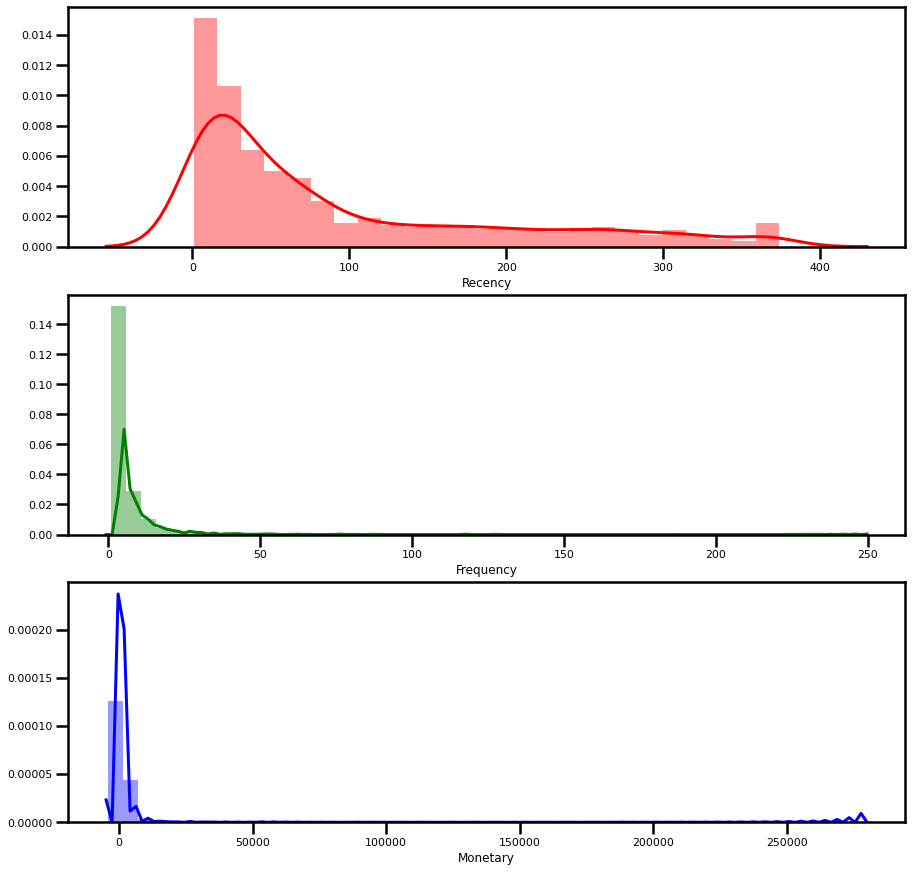

In [ ]:
fig,axes = plt.subplots(3,1,figsize=(15,15))
sns.distplot(rfm_table.Recency,color='Red',axlabel='Recency',ax=axes[0])
sns.distplot(rfm_table.Frequency,color='Green',axlabel='Frequency',ax=axes[1])
sns.distplot(rfm_table.Monetary,color='Blue',axlabel='Monetary',ax=axes[2])
plt.show()

In [ ]:
rfm_table.describe()

Recency  Frequency  Monetary
count  4372.00    4372.00   4372.00
mean     92.58       5.08   1893.54
std     100.77       9.34   8218.70
min       1.00       1.00  -4287.63
25%      17.00       1.00    291.80
50%      51.00       3.00    644.07
75%     144.00       5.00   1608.34
max     374.00     248.00 279489.02

In [ ]:
scaled_rfm = rfm_table.copy()
scaled_rfm.Monetary = rfm_table.Monetary + abs(rfm_table.Monetary.min())+1
scaled_rfm.Recency = rfm_table.Recency + abs(rfm_table.Recency.min())+1
scaled_rfm.describe()

Recency  Frequency  Monetary
count  4372.00    4372.00   4372.00
mean     94.58       5.08   6182.17
std     100.77       9.34   8218.70
min       3.00       1.00      1.00
25%      19.00       1.00   4580.43
50%      53.00       3.00   4932.70
75%     146.00       5.00   5896.97
max     376.00     248.00 283777.65

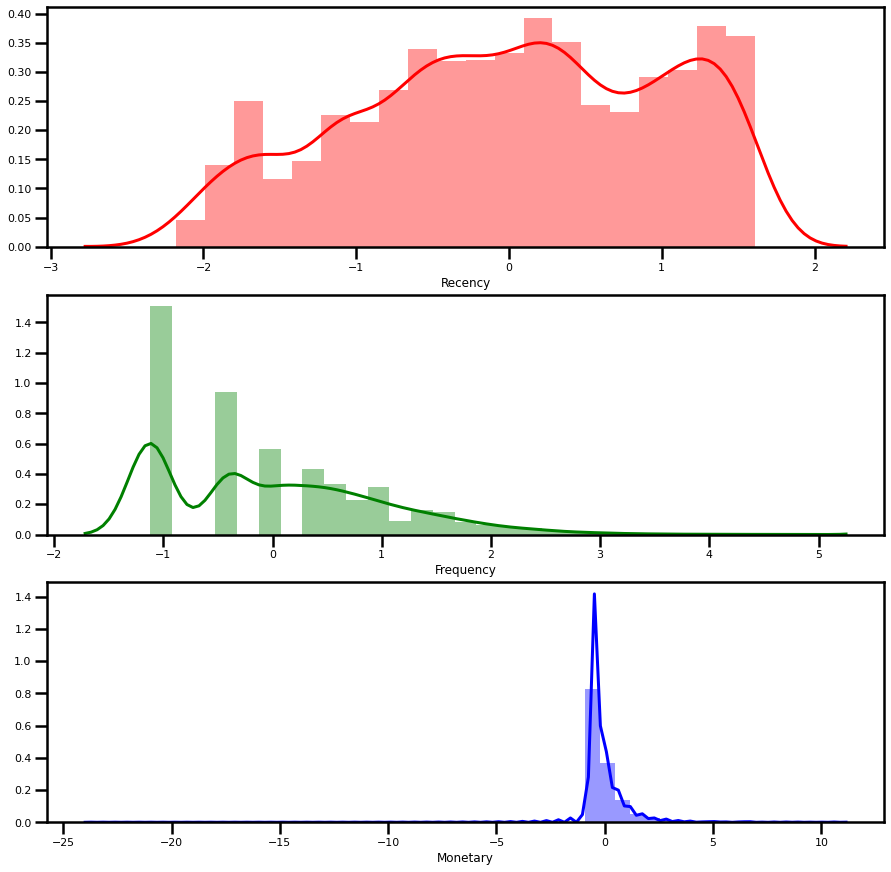

In [ ]:
import numpy as np

from sklearn.preprocessing import StandardScaler

log_df = np.log(scaled_rfm)
scal = StandardScaler()
normal_ = scal.fit_transform(log_df)
normal_ = pd.DataFrame(data=normal_,index = rfm_table.index,columns=rfm_table.columns)

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_.Recency , color="Red", ax=axes[0], axlabel='Recency')
sns.distplot(normal_.Frequency , color="Green", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_.Monetary , color="Blue", ax=axes[2], axlabel='Monetary')
plt.show()